Goal is to create an ML, noise-robust control example from the PCAP data set

Steps / to-dos:
1. Get the PCA data in
1. Try to reproduce the PCA results (2 vectors w 92%)
1. Try to improve on it with NMF, log scaling, 2 category columns, etc.
1. Create a noisy data set, check robustness
1. Create a hypothetical time series (w/ noise/drift)
1. Create a DQN to control it?

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/hans/scikit_learn_data


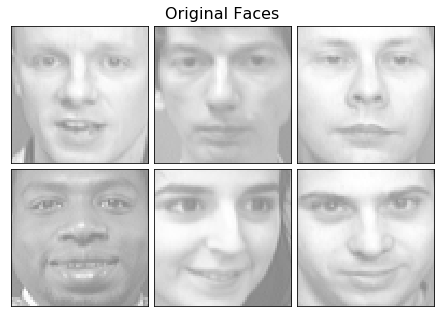

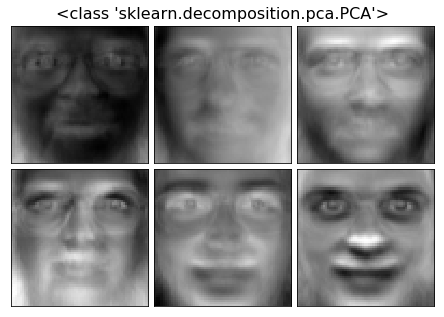

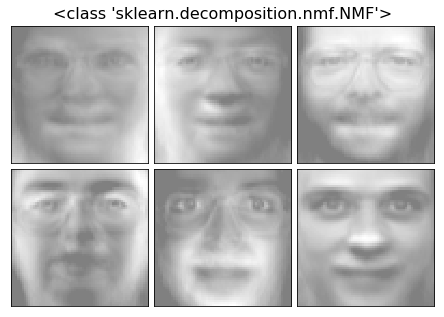

In [1]:
# This is just the example code to see if it runs - SUCCESS!
# Eigenfaces using NMF and PCA

from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
from matplotlib import pyplot as plt

# Fetch data of 400 faces.  Each face is a greyscale 64 x 64 dimensional image,
# making this a 4096 dimensional feature space
dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
X = dataset.data

n_col = 3
n_row = 2
n_components = n_col * n_row
image_shape = (64, 64)

def plot_gallery(title, images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                  interpolation='nearest',
                  vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()

transformers = [
    decomposition.PCA(n_components=n_components, whiten=True),
    decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
]

plot_gallery("Original Faces", X[:6,:], n_row=n_row, n_col=n_col)
for transformer in transformers:
    transformer.fit(X)
    plot_gallery(str(transformer.__class__), transformer.components_, n_row=n_row, n_col=n_col)